# Hopper Product Analyst Assignment

## by Boris Chu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('productanalyst_assignmentdata.csv')

In [3]:
df.head(5)

,shop_date,lodging_name,market,num_guests,check_in,check_out,advance,los,hopper_price,competitor_1,competitor_2,competitor_3,competitor_4
0,12/19/2022,Hotel 19,Atlanta,2,12/19,12/20,0,1,73,118,101,118,118
1,12/19/2022,Hotel 19,Atlanta,2,12/22,12/23,3,1,85,120,113,120,132
2,12/19/2022,Hotel 19,Atlanta,2,12/19,12/23,0,4,418,477,439,477,515
3,12/19/2022,Hotel 19,Atlanta,2,12/22,12/26,3,4,466,531,501,531,588
4,12/19/2022,Hotel 19,Atlanta,2,12/19,12/25,0,6,618,717,665,717,780


In [4]:
df = df.replace({'Sold Out': 0, 'Sold out': 0})
df['hopper_price'] = df['hopper_price'].astype(int)
df['shop_date']= pd.to_datetime(df['shop_date'])
df[['competitor_1','competitor_2', 'competitor_3', 'competitor_4']] = \
df[['competitor_1','competitor_2', 'competitor_3', 'competitor_4']].astype(int)
df['lowest_competitor_price'] = df[['competitor_1','competitor_2', 'competitor_3', 'competitor_4']].min(axis=1)
df['highest_competitor_price'] = df[['competitor_1','competitor_2', 'competitor_3', 'competitor_4']].max(axis=1)
df['competitive_margin'] =  df['lowest_competitor_price'] - df['hopper_price']

In [5]:
df.dtypes

shop_date                   datetime64[ns]
lodging_name                        object
market                              object
num_guests                           int64
check_in                            object
check_out                           object
advance                              int64
los                                  int64
hopper_price                         int32
competitor_1                         int32
competitor_2                         int32
competitor_3                         int32
competitor_4                         int32
lowest_competitor_price              int32
highest_competitor_price             int32
competitive_margin                   int32
dtype: object

In [6]:
df.head(5)

,shop_date,lodging_name,market,num_guests,check_in,check_out,advance,los,hopper_price,competitor_1,competitor_2,competitor_3,competitor_4,lowest_competitor_price,highest_competitor_price,competitive_margin
0,2022-12-19,Hotel 19,Atlanta,2,12/19,12/20,0,1,73,118,101,118,118,101,118,28
1,2022-12-19,Hotel 19,Atlanta,2,12/22,12/23,3,1,85,120,113,120,132,113,132,28
2,2022-12-19,Hotel 19,Atlanta,2,12/19,12/23,0,4,418,477,439,477,515,439,515,21
3,2022-12-19,Hotel 19,Atlanta,2,12/22,12/26,3,4,466,531,501,531,588,501,588,35
4,2022-12-19,Hotel 19,Atlanta,2,12/19,12/25,0,6,618,717,665,717,780,665,780,47


In [7]:
df['market'].unique()

array(['Atlanta', 'Austin', 'Boston', 'Cancun', 'Charlotte', 'Chicago',
       'Dallas', 'Denver', 'Fort Lauderdale', 'Honolulu', 'Houston',
       'Las Vegas', 'Los Angeles', 'Miami', 'Nashville', 'New Orleans',
       'New York', 'Orlando', 'Phoenix', 'Portland', 'San Francisco',
       'Seattle', 'Tampa', 'Temecula', 'Washington'], dtype=object)

In [8]:
len(df['market'].unique())

25

In [9]:
df['advance'].unique()

array([0, 3], dtype=int64)

In [10]:
df['los'].unique()

array([1, 4, 6], dtype=int64)

In [11]:
df['competitive_margin'].describe()

count    8080.000000
mean      -37.114233
std       339.813367
min     -7877.000000
25%       -16.000000
50%        13.000000
75%        42.000000
max      2103.000000
Name: competitive_margin, dtype: float64

#### The mean of competitive margins is negative while the median is positive, creating a distribution that is skewed left (tail at the left)

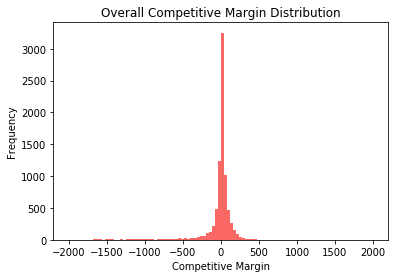

In [12]:
plt.hist(df['competitive_margin'], bins=100, range=(-2000,2000), color='#FA6866')
plt.title('Overall Competitive Margin Distribution')
plt.xlabel('Competitive Margin')
plt.ylabel('Frequency')
plt.show()

In [13]:
in_range = df[(df['competitive_margin']>-500)&(df['competitive_margin']<500)]['competitive_margin'].count()
total_count = df['competitive_margin'].count()
in_range/total_count

0.9611386138613861

#### 96% of listings have a competitive margin between -500 and 500

***

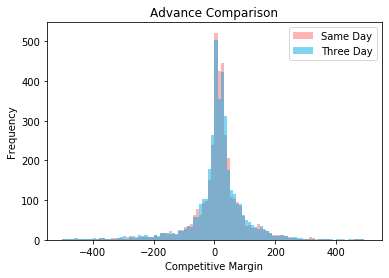

In [14]:
same_day_advance = df[df['advance']==0]
three_day_advance = df[df['advance']==3]
plt.hist(same_day_advance['competitive_margin'], bins=100, range=(-500,500), color='#FA6866', alpha=0.5, label='Same Day')
plt.hist(three_day_advance['competitive_margin'], bins=100, range=(-500,500), color='#01AAE4', alpha=0.5, label='Three Day')
plt.legend(loc='upper right')
plt.title('Advance Comparison')
plt.xlabel('Competitive Margin')
plt.ylabel('Frequency')
plt.show()

#### No big differences in distributions between same or 3 day advance 

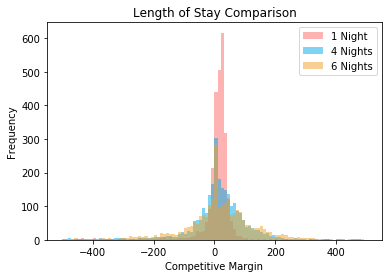

In [15]:
one_los = df[df['los']==1]
four_los = df[df['los']==4]
six_los = df[df['los']==6]
plt.hist(one_los['competitive_margin'], bins=100, range=(-500,500), color='#FA6866', alpha=0.5, label='1 Night')
plt.hist(four_los['competitive_margin'], bins=100, range=(-500,500), color='#01AAE4', alpha=0.5, label='4 Nights')
plt.hist(six_los['competitive_margin'], bins=100, range=(-500,500), color='#F0A02A', alpha=0.5, label='6 Nights')
plt.legend(loc='upper right')
plt.title('Length of Stay Comparison')
plt.xlabel('Competitive Margin')
plt.ylabel('Frequency')
plt.show()

#### Distribution wider as length of stay increases. The distribution also flattens which indicates increased variability in pricing. 

In [16]:
market_summary = df.groupby(['los']).agg(
    mean=('competitive_margin', np.mean),
    median=('competitive_margin', np.median),
    std_dev=('competitive_margin', np.std),
    count=('competitive_margin', 'count')).reset_index().round(1)
market_summary.sort_values(by=['los', 'std_dev']).reset_index(drop=True)

,los,mean,median,std_dev,count
0,1,5.7,17,65.6,2698
1,4,-36.3,11,317.7,2693
2,6,-80.8,1,487.7,2689


#### Summary statistics show a flatter and more skewed distribution as LOS increases

In [17]:
competitive_margin_df = df.groupby(['market']).agg(
    mean=('competitive_margin', np.mean),
    median=('competitive_margin', np.median),
    count=('competitive_margin', 'count')).reset_index().round(1)
competitive_margin_df = competitive_margin_df.sort_values(by=['median']).reset_index(drop=True)
with pd.option_context('display.max_rows',6):
    display(competitive_margin_df)

,market,mean,median,count
0,Austin,-102.5,-6.0,356
1,Honolulu,-187.8,-6.0,360
2,Cancun,-184.2,0.0,351
...,...,...,...,...
22,Fort Lauderdale,-59.1,24.0,359
23,Atlanta,-6.3,24.0,360
24,Chicago,40.2,25.5,360


#### Austin with the most negative median competitive margin while Chicago with the most positive median competitive margin

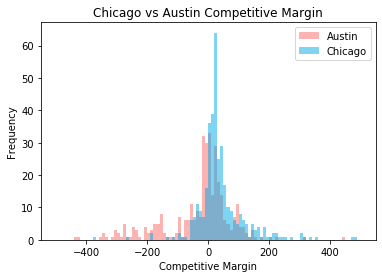

In [18]:
austin_market = df[df['market']=='Austin']
chicago_market = df[df['market']=='Chicago']
plt.hist(austin_market['competitive_margin'], range=(-500,500), bins=100, color='#FA6866', alpha=0.5, label='Austin')
plt.hist(chicago_market['competitive_margin'], range=(-500,500), bins=100, color='#01AAE4', alpha=0.5, label='Chicago')
plt.legend(loc='upper right')
plt.title('Chicago vs Austin Competitive Margin')
plt.xlabel('Competitive Margin')
plt.ylabel('Frequency')
plt.show()

#### Skewed left distribution for Austin, indicating more negative competitive margin room offerings

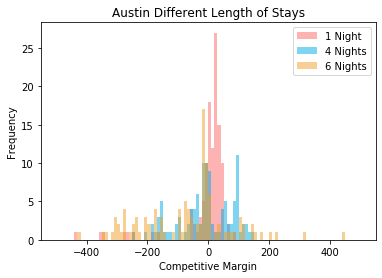

In [19]:
austin_one_los = austin_market[austin_market['los']==1]
austin_four_los = austin_market[austin_market['los']==4]
austin_six_los = austin_market[austin_market['los']==6]
plt.hist(austin_one_los['competitive_margin'], range=(-500,500), bins=100, color='#FA6866', alpha=0.5, label='1 Night')
plt.hist(austin_four_los['competitive_margin'], range=(-500,500), bins=100, color='#01AAE4', alpha=0.5, label='4 Nights')
plt.hist(austin_six_los['competitive_margin'], range=(-500,500), bins=100, color='#F0A02A', alpha=0.5, label='6 Nights')
plt.legend(loc='upper right')
plt.title('Austin Different Length of Stays')
plt.xlabel('Competitive Margin')
plt.ylabel('Frequency')
plt.show()

#### LOS the largest factor in Austin's skewed left distribution

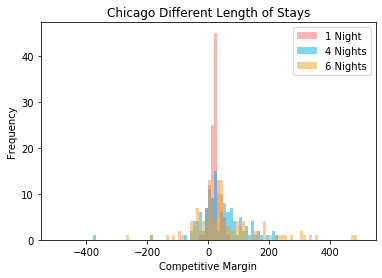

In [20]:
chicago_one_los = chicago_market[chicago_market['los']==1]
chicago_four_los = chicago_market[chicago_market['los']==4]
chicago_six_los = chicago_market[chicago_market['los']==6]
plt.hist(chicago_one_los['competitive_margin'], range=(-500,500), bins=100, color='#FA6866', alpha=0.5, label='1 Night')
plt.hist(chicago_four_los['competitive_margin'], range=(-500,500), bins=100, color='#01AAE4', alpha=0.5, label='4 Nights')
plt.hist(chicago_six_los['competitive_margin'], range=(-500,500), bins=100, color='#F0A02A', alpha=0.5, label='6 Nights')
plt.legend(loc='upper right')
plt.title('Chicago Different Length of Stays')
plt.xlabel('Competitive Margin')
plt.ylabel('Frequency')
plt.show()

#### Healthy distribution for Chicago

In [21]:
austin_chicago_margin = df[(df['market']=='Austin')|(df['market']=='Chicago')]
austin_chicago_margin = austin_chicago_margin.groupby(['market', 'los']).agg(
    positive_count=('competitive_margin' , lambda x : x[x > 0].count()),
    count=('competitive_margin', 'count')).reset_index()
austin_chicago_margin = austin_chicago_margin.sort_values(by=['market']).reset_index(drop=True)
austin_chicago_margin['%_positive_comp_margin'] = austin_chicago_margin['positive_count'] * 100 / austin_chicago_margin['count']
austin_chicago_margin.round(1)

,market,los,positive_count,count,%_positive_comp_margin
0,Austin,1,83,118,70.3
1,Austin,4,44,119,37.0
2,Austin,6,21,119,17.6
3,Chicago,1,106,120,88.3
4,Chicago,4,88,120,73.3
5,Chicago,6,82,120,68.3


#### Only 18% of Austin hotel offerings with 6 nights of stay have positive competitive margins

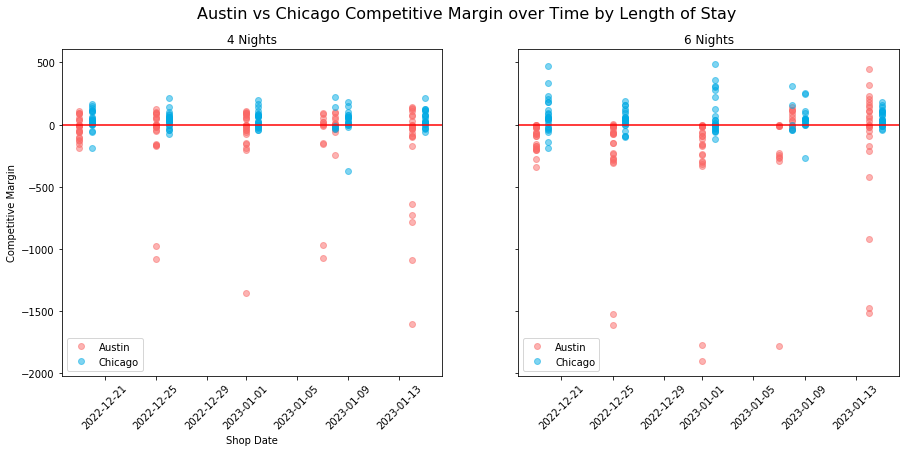

In [22]:
austin_six_los = austin_six_los[austin_six_los.competitive_margin > -4000]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6), sharey=True)
ax1.plot_date(austin_four_los.shop_date, austin_four_los.competitive_margin, color='#FA6866', alpha=0.5, label='Austin')
ax1.plot_date(chicago_four_los.shop_date, chicago_four_los.competitive_margin, color='#01AAE4', alpha=0.5, label='Chicago')
ax2.plot_date(austin_six_los.shop_date, austin_six_los.competitive_margin, color='#FA6866', alpha=0.5, label='Austin')
ax2.plot_date(chicago_six_los.shop_date, chicago_six_los.competitive_margin, color='#01AAE4', alpha=0.5, label='Chicago')
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
fig.suptitle('Austin vs Chicago Competitive Margin over Time by Length of Stay', fontsize=16)
ax1.title.set_text('4 Nights')
ax2.title.set_text('6 Nights')
ax1.set_xlabel('Shop Date')
ax1.set_ylabel('Competitive Margin')
ax1.set_xlabel('Shop Date')
ax1.set_ylabel('Competitive Margin')
ax1.legend(loc='lower left')
ax2.legend(loc='lower left')
ax1.axhline(y=0, color='r', linestyle='-')
ax2.axhline(y=0, color='r', linestyle='-')
plt.show()

#### Visualization of Austin 6 night stays where large percentage of hotels are priced with a negative competitive margin pre-holidays (Christmas and New Years)

***

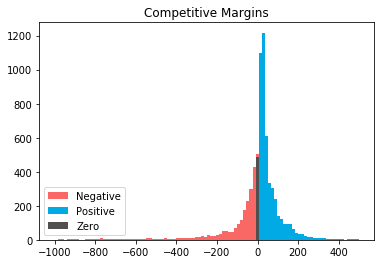

In [23]:
positive_comp_margin = df[df['competitive_margin'] > 0]
negative_comp_margin = df[df['competitive_margin'] < 0]
zero_comp_margin = df[df['competitive_margin'] == 0]
plt.hist(negative_comp_margin['competitive_margin'], bins=100, range=(-1000,500), color='#FA6866', label='Negative')
plt.hist(positive_comp_margin['competitive_margin'], bins=100, range=(-1000,500), color='#01AAE4', label='Positive')
plt.hist(zero_comp_margin['competitive_margin'], bins=100, range=(-1000,500), color='#505050', label='Zero')
plt.legend(loc='lower left')
plt.title('Competitive Margins')
plt.show()

#### Overall competitive margin distributions

In [24]:
overall_margin_stats = df.groupby(['los']).agg(
    positive_count=('competitive_margin' , lambda x : x[x > 0].count()),
    count=('competitive_margin', 'count')).reset_index()
overall_margin_stats = overall_margin_stats.sort_values(by=['los']).reset_index(drop=True)
overall_margin_stats['%_positive_comp_margin'] = overall_margin_stats['positive_count'] * 100 / overall_margin_stats['count']
overall_margin_stats.round(1)

,los,positive_count,count,%_positive_comp_margin
0,1,2011,2698,74.5
1,4,1511,2693,56.1
2,6,1349,2689,50.2


#### Investigating the spread between positive competitive margins for different lengths of stay could unlock pricing improvements 
#### For example, price hotels with 4 nights more aggressively to gain market share (lower Hopper price = increase in positive competitive margin) because the current spread between 4 and 6 nights is low

In [25]:
overall_margin_stats = df.groupby(['market', 'los']).agg(
    positive_count=('competitive_margin' , lambda x : x[x > 0].count()),
    count=('competitive_margin', 'count')).reset_index()
overall_margin_stats = overall_margin_stats.sort_values(by=['market', 'los']).reset_index(drop=True)
overall_margin_stats['%_positive_comp_margin'] = overall_margin_stats['positive_count'] * 100 / overall_margin_stats['count']

In [26]:
los_margin_stats = df.groupby(['shop_date', 'los']).agg(
    positive_count=('competitive_margin' , lambda x : x[x > 0].count()),
    count=('competitive_margin', 'count')).reset_index()
los_margin_stats = los_margin_stats.sort_values(by=['shop_date', 'los']).reset_index(drop=True)
los_margin_stats['%_positive_comp_margin'] = los_margin_stats['positive_count'] * 100 / overall_margin_stats['count']
one_four_los = los_margin_stats.loc[(los_margin_stats['los']==1)|(los_margin_stats['los']==4)]
one_four_los = one_four_los.sort_values(['shop_date', 'los'], ascending=False)
one_four_los['one_four_night_spread'] = one_four_los.groupby('shop_date')['%_positive_comp_margin'].diff()
one_four_los = one_four_los[['shop_date', 'one_four_night_spread']].dropna().reset_index()
four_six_los = los_margin_stats.loc[(los_margin_stats['los']==4)|(los_margin_stats['los']==6)]
four_six_los = four_six_los.sort_values(['shop_date', 'los'], ascending=False)
four_six_los['four_six_night_spread'] = four_six_los.groupby('shop_date')['%_positive_comp_margin'].diff()
four_six_los = four_six_los[['shop_date', 'four_six_night_spread']].dropna().reset_index()

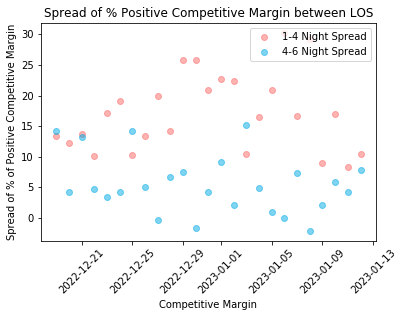

In [27]:
plt.plot_date(one_four_los.shop_date, one_four_los['one_four_night_spread'], color='#FA6866', alpha=0.5, label='1-4 Night Spread')
plt.plot_date(four_six_los.shop_date, four_six_los['four_six_night_spread'], color='#01AAE4',  alpha=0.5, label='4-6 Night Spread')
plt.title('Spread of % Positive Competitive Margin between LOS')
plt.xlabel('Competitive Margin')
plt.ylabel('Spread of % of Positive Competitive Margin')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

#### Spread of different lengths of stay decreasing which indicates healthier competitive pricing for Hopper 